In [ ]:
!pip install tensorflow
!pip install -c anaconda keras
!pip install -U scikit-learn scipy matplotlib

In [76]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
plt.style.use('fivethirtyeight')

In [77]:
df1 = pd.read_csv("nepse.csv")
df1.head(5)

,id,date,symbol,open,high,low,close,volume,amount,adj_close
0,424236,2024-03-03,NEPSE,1972.62,1975.39,1946.42,1960.30,5238696.0,2.058594e+09,1958.835611
1,423910,2024-02-29,NEPSE,2001.02,2007.57,1970.04,1972.09,6866165.0,2.570466e+09,1982.180486
2,423584,2024-02-28,NEPSE,2002.93,2009.50,1992.46,2000.77,4802051.0,2.025441e+09,2000.932968
3,423259,2024-02-27,NEPSE,1992.69,2007.85,1980.43,2001.64,4831386.0,1.851601e+09,1994.616059
4,422934,2024-02-26,NEPSE,1980.89,1997.52,1973.30,1992.30,5308222.0,1.987154e+09,1983.024543


In [78]:
# Check if the column "close price" exists in the DataFrame (case-insensitive)
if any(col.lower() == "close" for col in df1.columns):
    # Rename the column "close price" to "Close" (case-insensitive)
    df1.rename(columns=lambda x: "Close" if x.lower() == "close" else x, inplace=True)
df1.head(5)

,id,date,symbol,open,high,low,Close,volume,amount,adj_close
0,424236,2024-03-03,NEPSE,1972.62,1975.39,1946.42,1960.30,5238696.0,2.058594e+09,1958.835611
1,423910,2024-02-29,NEPSE,2001.02,2007.57,1970.04,1972.09,6866165.0,2.570466e+09,1982.180486
2,423584,2024-02-28,NEPSE,2002.93,2009.50,1992.46,2000.77,4802051.0,2.025441e+09,2000.932968
3,423259,2024-02-27,NEPSE,1992.69,2007.85,1980.43,2001.64,4831386.0,1.851601e+09,1994.616059
4,422934,2024-02-26,NEPSE,1980.89,1997.52,1973.30,1992.30,5308222.0,1.987154e+09,1983.024543


In [79]:
df = df1[::-1]
df.head(5)

,id,date,symbol,open,high,low,Close,volume,amount,adj_close
5082,1,2001-09-11,NEPSE,274.34,274.34,274.34,274.34,0.0,0.0,NaN
5081,2,2001-09-12,NEPSE,269.17,269.17,269.17,269.17,0.0,0.0,NaN
5080,3,2001-09-13,NEPSE,261.37,261.37,261.37,261.37,0.0,0.0,NaN
5079,4,2001-09-14,NEPSE,265.22,265.22,265.22,265.22,0.0,0.0,NaN
5078,5,2001-09-17,NEPSE,273.01,273.01,273.01,273.01,0.0,0.0,NaN


In [80]:
df.tail(5)

,id,date,symbol,open,high,low,Close,volume,amount,adj_close
4,422934,2024-02-26,NEPSE,1980.89,1997.52,1973.30,1992.30,5308222.0,1.987154e+09,1983.024543
3,423259,2024-02-27,NEPSE,1992.69,2007.85,1980.43,2001.64,4831386.0,1.851601e+09,1994.616059
2,423584,2024-02-28,NEPSE,2002.93,2009.50,1992.46,2000.77,4802051.0,2.025441e+09,2000.932968
1,423910,2024-02-29,NEPSE,2001.02,2007.57,1970.04,1972.09,6866165.0,2.570466e+09,1982.180486
0,424236,2024-03-03,NEPSE,1972.62,1975.39,1946.42,1960.30,5238696.0,2.058594e+09,1958.835611


In [81]:
df

,id,date,symbol,open,high,low,Close,volume,amount,adj_close
5082,1,2001-09-11,NEPSE,274.34,274.34,274.34,274.34,0.0,0.000000e+00,NaN
5081,2,2001-09-12,NEPSE,269.17,269.17,269.17,269.17,0.0,0.000000e+00,NaN
5080,3,2001-09-13,NEPSE,261.37,261.37,261.37,261.37,0.0,0.000000e+00,NaN
5079,4,2001-09-14,NEPSE,265.22,265.22,265.22,265.22,0.0,0.000000e+00,NaN
5078,5,2001-09-17,NEPSE,273.01,273.01,273.01,273.01,0.0,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...
4,422934,2024-02-26,NEPSE,1980.89,1997.52,1973.30,1992.30,5308222.0,1.987154e+09,1983.024543
3,423259,2024-02-27,NEPSE,1992.69,2007.85,1980.43,2001.64,4831386.0,1.851601e+09,1994.616059
2,423584,2024-02-28,NEPSE,2002.93,2009.50,1992.46,2000.77,4802051.0,2.025441e+09,2000.932968
1,423910,2024-02-29,NEPSE,2001.02,2007.57,1970.04,1972.09,6866165.0,2.570466e+09,1982.180486


In [82]:
df.describe()

,id,open,high,low,Close,volume,amount,adj_close
count,5083.000000,5083.000000,5083.000000,5083.000000,5083.000000,5.083000e+03,5.083000e+03,671.000000
mean,82958.278969,972.252786,977.098369,966.548165,971.482573,6.248414e+08,8.009361e+08,2268.830126
std,115008.824100,715.958195,722.726606,707.268646,714.387537,2.028729e+09,2.106684e+09,389.112158
min,1.000000,186.220000,186.220000,186.220000,186.220000,0.000000e+00,0.000000e+00,1814.710083
25%,1271.500000,372.005000,372.005000,372.005000,372.005000,0.000000e+00,0.000000e+00,1957.526539
50%,15321.000000,773.540000,773.540000,773.540000,773.540000,0.000000e+00,0.000000e+00,2091.134884
75%,139322.500000,1389.385000,1398.560000,1381.880000,1389.385000,2.134675e+08,5.129515e+08,2640.119010
max,424236.000000,3208.530800,3227.110000,3178.250000,3198.190000,2.164760e+10,2.164760e+10,3203.748026


In [83]:
mean = df['Close'].mean()
mean

971.482572634271

In [84]:
df.shape

(5083, 10)

In [85]:
df.isnull().values.any()

True

In [86]:
sum(df.duplicated())

0

In [87]:
df=df.reset_index()
df.head()

,index,id,date,symbol,open,high,low,Close,volume,amount,adj_close
0,5082,1,2001-09-11,NEPSE,274.34,274.34,274.34,274.34,0.0,0.0,NaN
1,5081,2,2001-09-12,NEPSE,269.17,269.17,269.17,269.17,0.0,0.0,NaN
2,5080,3,2001-09-13,NEPSE,261.37,261.37,261.37,261.37,0.0,0.0,NaN
3,5079,4,2001-09-14,NEPSE,265.22,265.22,265.22,265.22,0.0,0.0,NaN
4,5078,5,2001-09-17,NEPSE,273.01,273.01,273.01,273.01,0.0,0.0,NaN


In [88]:
df=df.drop(['date','symbol'],axis=1)
df.head()

,index,id,open,high,low,Close,volume,amount,adj_close
0,5082,1,274.34,274.34,274.34,274.34,0.0,0.0,NaN
1,5081,2,269.17,269.17,269.17,269.17,0.0,0.0,NaN
2,5080,3,261.37,261.37,261.37,261.37,0.0,0.0,NaN
3,5079,4,265.22,265.22,265.22,265.22,0.0,0.0,NaN
4,5078,5,273.01,273.01,273.01,273.01,0.0,0.0,NaN


In [89]:
df_filled = df.fillna(df.mean())

In [90]:
df = df_filled

In [91]:
df.isnull().values.any()

False

In [92]:
if df_cleaned.isnull().values.any():
    print("Null values still present after cleaning.")
else:
    print("No null values present after cleaning.")

No null values present after cleaning.


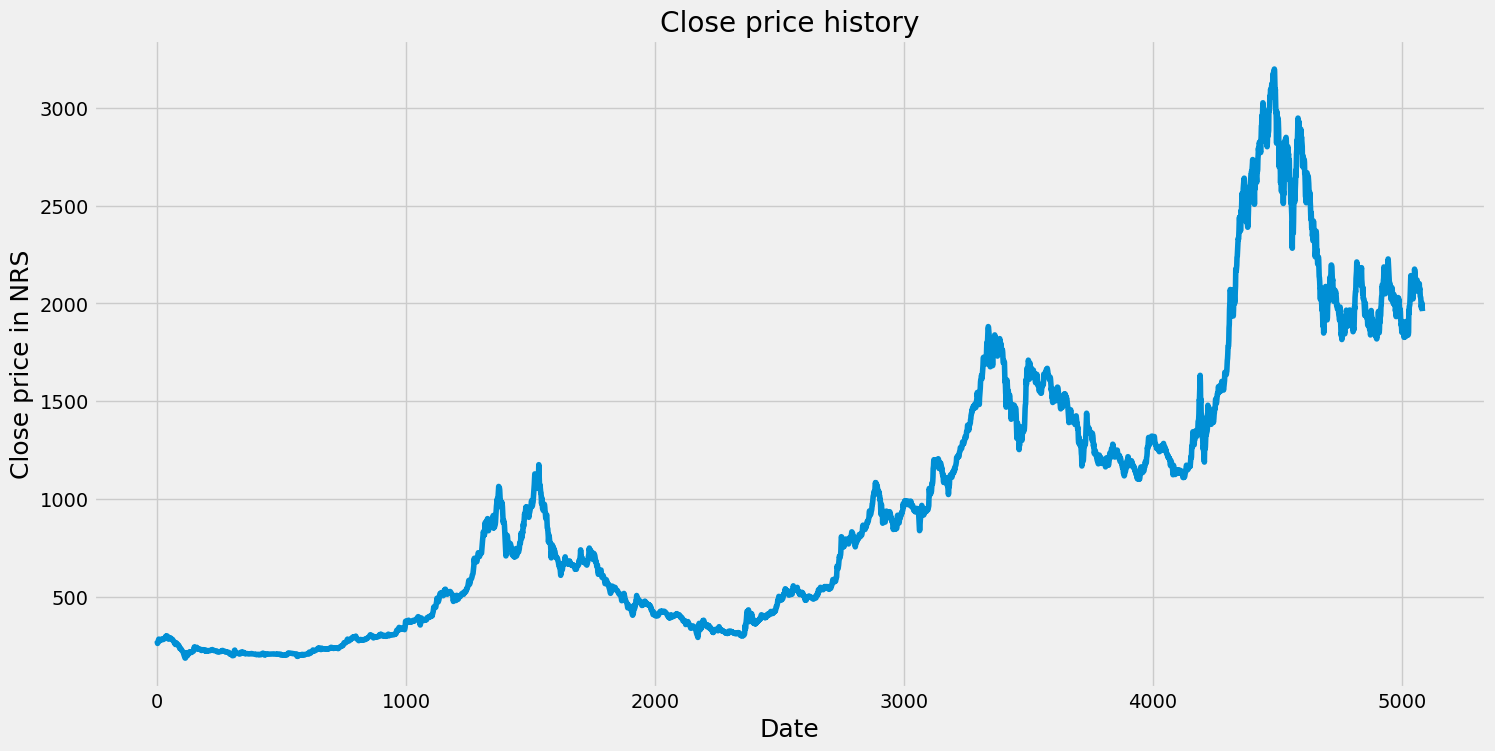

In [93]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price in NRS', fontsize=18)
plt.show()


In [94]:
data = df.filter(['Close']) #taking close value only

dataset = data.values # convert to numpy array

training_data_length = math.ceil(len(dataset) * 0.8) #80% data taken for training
dataset


array([[ 274.34],
       [ 269.17],
       [ 261.37],
       ...,
       [2000.77],
       [1972.09],
       [1960.3 ]])

In [95]:
scaler = MinMaxScaler(feature_range=(0,1))  #Scale data into 0-1
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0292566 ],
       [0.02754011],
       [0.02495045],
       ...,
       [0.60244624],
       [0.59292423],
       [0.58900985]])

In [96]:

# create training data set
train_data = scaled_data[:training_data_length, :]
x_train = [] #independent training variabls
y_train = [] #dependent training variables

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

#x_train contains 60 values which are used to train the 61th value
#   which is stored in y_train variable
     

#After this loop, x_train will contain sequences of 60 data points each, and y_train will contain the corresponding next data point that the model needs to predict. This way, you create a supervised learning dataset suitable for training an LSTM model for time series forecasting

In [97]:
#convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [98]:
x_train.shape


(4007, 60)

In [99]:
y_train.shape

(4007,)

In [100]:
#Reshape the data as LSTM expects input to be 3D but our current dataset is 2D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.0292566 ],
        [0.02754011],
        [0.02495045],
        ...,
        [0.03262317],
        [0.03224136],
        [0.0323808 ]],

       [[0.02754011],
        [0.02495045],
        [0.02622868],
        ...,
        [0.03224136],
        [0.0323808 ],
        [0.03206539]],

       [[0.02495045],
        [0.02622868],
        [0.02881503],
        ...,
        [0.0323808 ],
        [0.03206539],
        [0.03134161]],

       ...,

       [[0.37439284],
        [0.37624877],
        [0.37167037],
        ...,
        [0.34110898],
        [0.34124842],
        [0.34091973]],

       [[0.37624877],
        [0.37167037],
        [0.36740738],
        ...,
        [0.34124842],
        [0.34091973],
        [0.33977762]],

       [[0.37167037],
        [0.36740738],
        [0.36622543],
        ...,
        [0.34091973],
        [0.33977762],
        [0.33762288]]])

In [101]:
# Now we will build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))  #first layer 
model.add(LSTM(50, return_sequences=False))   #second layer
model.add(Dense(25))   #this line adds a fully connected dense layer with 25 neurons.
model.add(Dense(1))   #output


Dense layers are traditional feedforward neural network layers, where each neuron is connected to every neuron in the previous layer.

In [102]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [103]:
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [104]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5,callbacks=[early_stopping])

Epoch 1/5
4007/4007 [==============================] - 89s 21ms/step - loss: 2.8403e-04
Epoch 2/5
4007/4007 [==============================] - 85s 21ms/step - loss: 1.2085e-04
Epoch 3/5
4007/4007 [==============================] - 85s 21ms/step - loss: 8.7604e-05
Epoch 4/5
4007/4007 [==============================] - 85s 21ms/step - loss: 5.8441e-05
Epoch 5/5
4007/4007 [==============================] - 85s 21ms/step - loss: 5.2262e-05


In [105]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


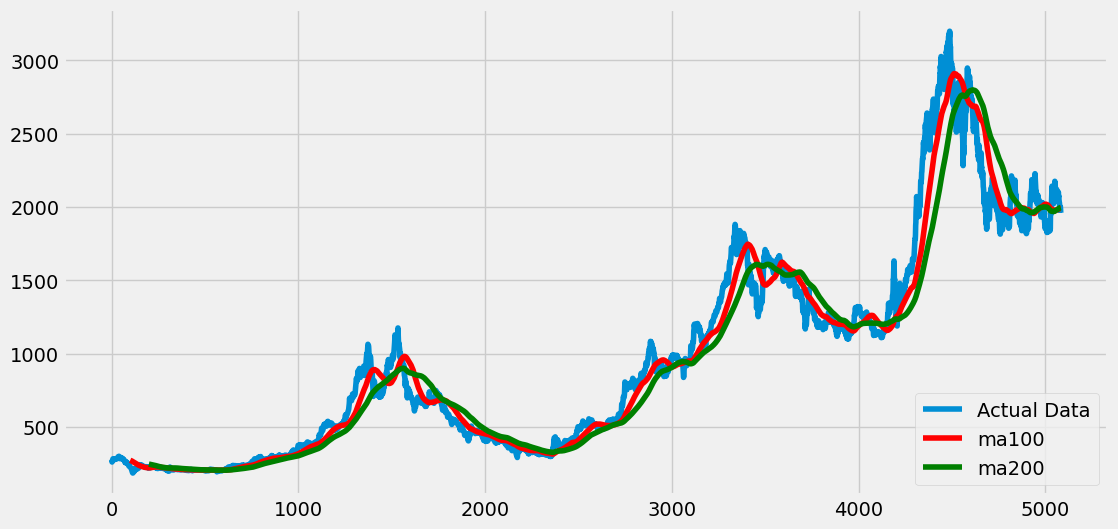

In [106]:
#plotting moving averages with actual data
ma100=df.Close.rolling(100).mean()
ma200=df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.legend(['Actual Data', 'ma100', 'ma200'], loc = 'lower right')

In [107]:
model.save('keras_model_Nepse.h5')

In [108]:
# Create the testing data set
#Taking data from index training datalength - 60 to last data for testing
test_data = scaled_data[training_data_length - 60:, :]  

test_data.shape

(1076, 1)

In [109]:
x_test = []
y_test = dataset[training_data_length: , :]  #contains data after last training data to end of data

for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])
     

In [110]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [111]:
# Reshape again to make it 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [112]:
x_test.shape

(1016, 60, 1)

In [113]:
y_test.shape

(1016, 1)

In [114]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscaling values
predictions.shape

32/32 [==============================] - 1s 17ms/step


(1016, 1)

In [115]:
predictions

array([[1209.3153],
       [1196.1252],
       [1196.8269],
       ...,
       [1989.4636],
       [1984.4797],
       [1948.7263]], dtype=float32)

In [116]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse 

23.500794380536416

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29380\1297236671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_val['Predictions'] = predictions


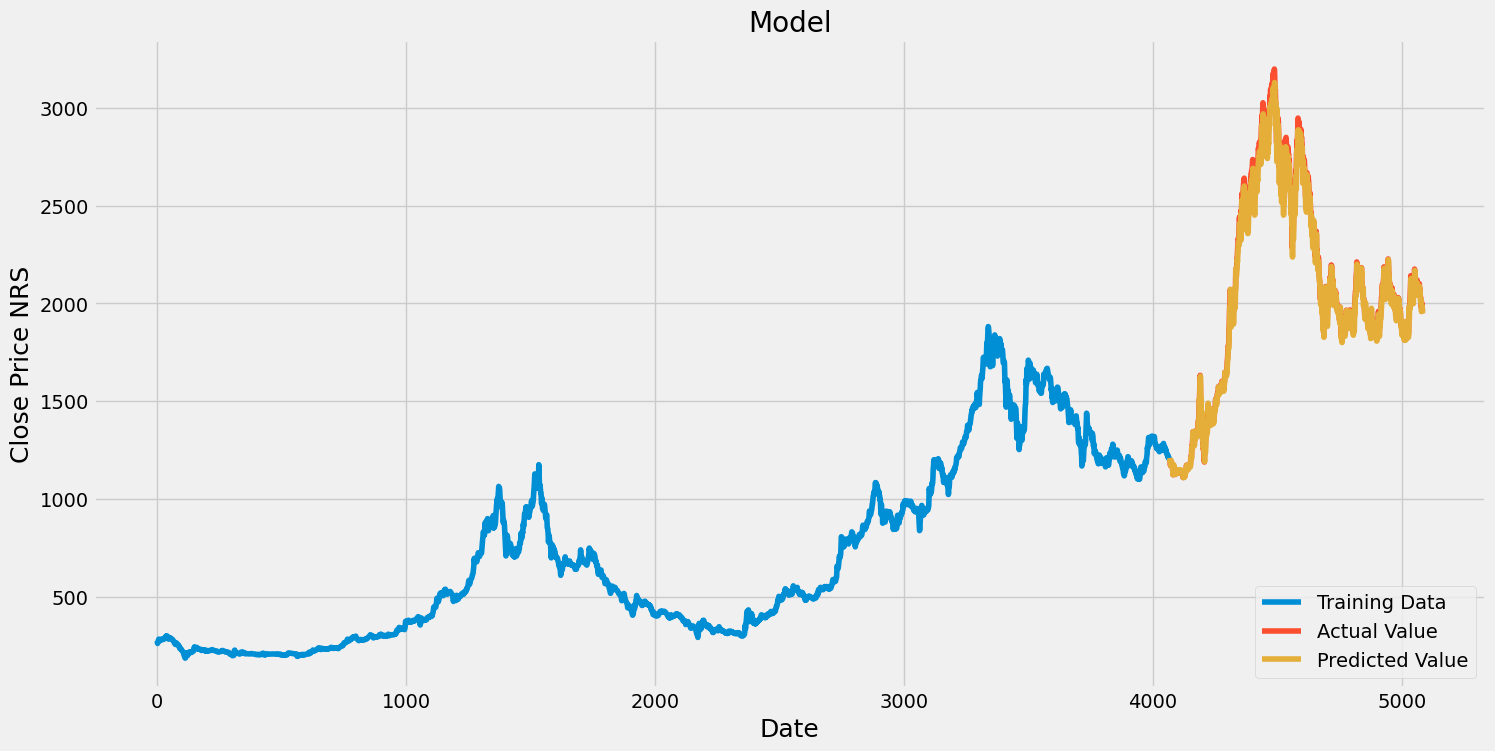

In [118]:

# Plot the data
train = data[:training_data_length]
actual_val = data[training_data_length:]
actual_val['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price NRS', fontsize=18)
plt.plot(train['Close'])
plt.plot(actual_val[['Close', 'Predictions']])
plt.legend(['Training Data', 'Actual Value', 'Predicted Value'], loc = 'lower right')

In [119]:
# Show the valid and predicted prices
actual_val

,Close,Predictions
4067,1197.75,1209.315308
4068,1196.41,1196.125244
4069,1184.78,1196.826904
4070,1170.34,1183.536743
4071,1190.90,1169.363647
...,...,...
5078,1992.30,1958.061523
5079,2001.64,1984.128052
5080,2000.77,1989.463623
5081,1972.09,1984.479736


In [124]:

# Get the quote
df1 = pd.read_csv("nepse.csv")
df_stock = df1[::-1]
new_df = df_stock.filter(['close'])

last_60_days = new_df[-60:].values   #taking value of last 60 days
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test) #convert to np array

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # shaping to 3D for LSTM model

pred_scale_price = model.predict(X_test)    #predicting the price for next day

pred_price = scaler.inverse_transform(pred_scale_price)  ##inversing the scaled value to actual value

print("the predicted price for the Stock for Coming Day is\n",pred_price)

# Predict prices for the next 30 days
pred_prices = []
for i in range(7):
    pred_scale_price = model.predict(X_test)    #predicting the price for next day
    pred_price = scaler.inverse_transform(pred_scale_price)  ##inversing the scaled value to actual value
    pred_prices.append(pred_price[0][0])  # Append the predicted price to the list
    # Shift the data by one day and append the newly predicted price
    X_test = np.append(X_test[:,1:,:], pred_scale_price.reshape((1,1,1)), axis=1)

print("\nThe predicted prices for the stock for the next 7 days are:")
for day, price in enumerate(pred_prices, start=1):
    print(f"Day {day}: {price}")

1/1 [==============================] - 0s 27ms/step
the predicted price for the Stock for Coming Day is
 [[1944.8027]]
1/1 [==============================] - 0s 32ms/step

The predicted prices for the stock for the next 7 days are:
Day 1: 1944.802734375
Day 2: 1928.59326171875
Day 3: 1912.7589111328125
Day 4: 1897.6893310546875
Day 5: 1883.325439453125
Day 6: 1869.56103515625
Day 7: 1856.324951171875
